In [24]:
import pandas as pd
import numpy as np

In [25]:
data=pd.read_csv("/Projects/dsin-python/DataSet/iris.csv",header=0)
data.sample(100)

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
71,72,6.1,2.8,4.0,1.3,versicolor
145,146,6.7,3.0,5.2,2.3,virginica
105,106,7.6,3.0,6.6,2.1,virginica
135,136,7.7,3.0,6.1,2.3,virginica
58,59,6.6,2.9,4.6,1.3,versicolor
...,...,...,...,...,...,...
18,19,5.7,3.8,1.7,0.3,setosa
124,125,6.7,3.3,5.7,2.1,virginica
99,100,5.7,2.8,4.1,1.3,versicolor
77,78,6.7,3.0,5.0,1.7,versicolor


In [26]:
data["Species"]=data["Species"].map({"versicolor":0,"setosa":1,"virginica":2})
data.sample(100)

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
93,94,5.0,2.3,3.3,1.0,0
125,126,7.2,3.2,6.0,1.8,2
1,2,4.9,3.0,1.4,0.2,1
59,60,5.2,2.7,3.9,1.4,0
19,20,5.1,3.8,1.5,0.3,1
...,...,...,...,...,...,...
36,37,5.5,3.5,1.3,0.2,1
127,128,6.1,3.0,4.9,1.8,2
135,136,7.7,3.0,6.1,2.3,2
118,119,7.7,2.6,6.9,2.3,2


In [27]:
class KNN:
    def __init__(self,k):#初始化方法，k是整型表示邻居的个数
        self.k=k
    def fit(self,X,y):
        '''训练方法，只有在预测的时候才会调用，X是用于预测的类似数组、向量，[样本数量，样本特征]
        y是样本数量'''
        self.X=np.array(X)
        self.y=np.array(y)
    def predict(self,X):
        #X是用于预测的类似数组、向量，[样本数量，样本特征]
        #返回预测的结果
        X=np.array(X)
        result=[]
        for x in X:
            dis=np.sqrt(np.sum((x-self.X)**2,axis=1))       #按照行的方向求和 
            '''
            ndarray的运算，可以直接加减，每一位上的元素加减，避免了一个循环；
            如果是低维减多维，就先把低维扩张成维数相同的向量
            '''
            #返回数组排序后，每个元素在原数组中排序前的索引
            index=dis.argsort()
            #取距离最近的k个元素
            index=index[:self.k]
            #返回数组中每个非负整数出现的次数
            count=np.bincount(self.y[index])
            #返回值最大的元素，对应的索引，该索引就是我们判定的类别
            result.append(count.argmax())
        return np.asarray(result)
    def predict2(self,X): #考虑权重的knn，距离越远，权重越小，距离越近，权重越大；权重可以用距离的倒数表示
        #返回预测的结果
        X=np.array(X)
        result=[]
        for x in X:
            dis=np.sqrt(np.sum((x-self.X)**2,axis=1))       #按照行的方向求和 
            '''
            ndarray的运算，可以直接加减，每一位上的元素加减，避免了一个循环；
            如果是低维减多维，就先把低维扩张成维数相同的向量
            '''
            #返回数组排序后，每个元素在原数组中排序前的索引
            index=dis.argsort()
            #取距离最近的k个元素
            index=index[:self.k]
            #返回数组中每个非负整数出现的次数，但是考虑权重，所以要在bincount里面改写
            count=np.bincount(self.y[index],weights=1/dis[index])
            #返回值最大的元素，对应的索引，该索引就是我们判定的类别
            result.append(count.argmax())
        return np.asarray(result)

In [28]:
#对数据集做一个拆分，拆出测试集和训练集
#要保证数据集选择的随机性和完整性
t0=data[data["Species"]==0]
t1=data[data["Species"]==1]
t2=data[data["Species"]==2]
t0=t0.sample(len(t0),random_state=0)    #random_state用于保存打乱顺序以复盘
t1=t1.sample(len(t1),random_state=0)
t2=t2.sample(len(t2),random_state=0)
train_X=pd.concat([t0.iloc[:40,:-1],t1.iloc[:40,:-1],t2.iloc[:40,:-1]],axis=0)    #:40表示前40行，:-1表示直到倒数第一列
train_y=pd.concat([t0.iloc[:40,-1],t1.iloc[:40,-1],t2.iloc[:40,-1]],axis=0)
test_X=pd.concat([t0.iloc[40:,:-1],t1.iloc[40:,:-1],t2.iloc[40:,:-1]],axis=0)
test_y=pd.concat([t0.iloc[40:,-1],t1.iloc[40:,-1],t2.iloc[40:,-1]],axis=0)
#创建KNN对象，进行训练与测试
knn=KNN(k=3)
#训练
knn.fit(train_X,train_y)
#进行测试，获得测试结果
result=knn.predict(test_X)
#display(result)
#display(test_y)
display(np.sum(result==test_y)) #计算预测正确的数量
display(len(result))

30

30

In [34]:
#带上权重预测predict2
result2=knn.predict2(test_X)
display(np.sum(result2==test_y))

30

In [29]:
#接下来做可视化的工作
import matplotlib as mpl
from matplotlib import pyplot as plt

In [30]:
#默认情况下matplotlib不支持中文显示，所以需要设置一下
mpl.rcParams["font.family"]="Microsoft YaHei"    #设置字体为黑体以中文显示
#设置在中文显示的时候，能够正常显示负号
mpl.rcParams["axes.unicode_minus"]=False

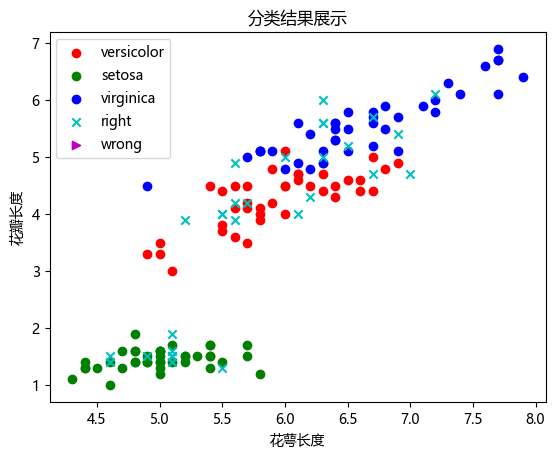

In [31]:
#绘制散点图，以花瓣的长度和花萼的长度为两个维度
#"versicolor":0,"setosa":1,"virginica":2
plt.scatter(x=t0["Sepal.Length"][:40],y=t0["Petal.Length"][:40],color="r",label="versicolor")
plt.scatter(x=t1["Sepal.Length"][:40],y=t1["Petal.Length"][:40],color="g",label="setosa")
plt.scatter(x=t2["Sepal.Length"][:40],y=t2["Petal.Length"][:40],color="b",label="virginica")
#接下来绘制测试集的数据
right=test_X[result==test_y]
wrong=test_X[result!=test_y]
plt.scatter(x=right["Sepal.Length"],y=right["Petal.Length"],color="c",marker="x",label="right")
plt.scatter(x=wrong["Sepal.Length"],y=wrong["Petal.Length"],color="m",marker=">",label="wrong")
plt.xlabel("花萼长度")
plt.ylabel("花瓣长度")
plt.title("分类结果展示")
plt.legend(loc="best")
plt.show()

In [32]:
np.bincount([0,1,1,0,1])    #不考虑weights

array([2, 3], dtype=int64)

In [33]:
np.bincount([0,1,1,0,1],weights=[0.5,0.3,0.2,0.1,0.05])     #考虑权重

array([0.6 , 0.55])